EDA

PROYECTOCTO INDIVIDUAL DATA ANALYTICS
Néstor Fabio Cardona Cifuentes

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


SE CARGA EL ARCHIVO AccidentesAviones.csv AL DATAFRAME df_accid_aereos PARA HACER EL ANALISIS EXPLORATORIO DE DATOS (EDA)

In [33]:
df_accid_aereos=pd.read_csv('AccidentesAviones.csv')

SE GRAFICA UN MAPA DE CALOR PARA DETECTAR VISIBLEMENTE LOS VALORES NaN O VACIOS

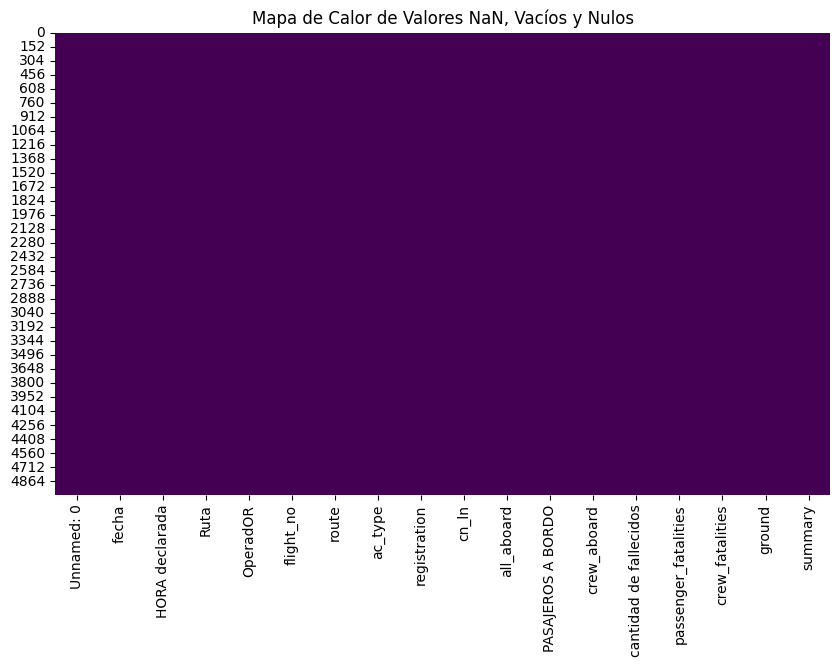

In [38]:
# Calcula una matriz booleana donde True representa valores NaN o vacíos
nan_empty_matrix = df_accid_aereos.isnull() | (df_accid_aereos == '')

# Crea un mapa de calor para visualizar los valores NaN, vacíos y nulos
plt.figure(figsize=(10, 6))
sns.heatmap(nan_empty_matrix, cmap='viridis', cbar=False)
plt.title('Mapa de Calor de Valores NaN, Vacíos y Nulos')
plt.show()


EN EL MAPA DE CALOR NO SE DETECTAN, POR TANTO, SE HACEN CONTEOS AL DATAFRAME PARA VALIDAR LA EXISTENCIA DE REGISTROS NaN, VACIOS Y NULOS

In [36]:
nan_counts = df_accid_aereos.isnull().sum()
empty_counts = (df_accid_aereos == '').sum()
total_nan_count = df_accid_aereos.isnull().sum().sum()

print(f'Valores NaN por columnas: {nan_counts}, valores en blanco en cada columna: {empty_counts}')
print(f'Total de Valores NaN del DataFrame: {total_nan_count}')


Valores NaN por columnas: Unnamed: 0                0
fecha                     0
HORA declarada            0
Ruta                      0
OperadOR                  0
flight_no                 0
route                     1
ac_type                   0
registration              0
cn_ln                     0
all_aboard                0
PASAJEROS A BORDO         0
crew_aboard               0
cantidad de fallecidos    0
passenger_fatalities      0
crew_fatalities           0
ground                    0
summary                   0
dtype: int64, valores en blanco en cada columna: Unnamed: 0                0
fecha                     0
HORA declarada            0
Ruta                      0
OperadOR                  0
flight_no                 0
route                     0
ac_type                   0
registration              0
cn_ln                     0
all_aboard                0
PASAJEROS A BORDO         0
crew_aboard               0
cantidad de fallecidos    0
passenger_fatalities      0
c

SE APRECIA UN DATAFRAME BASTANTE DEPURADO PARA HACER LOS KPI PROPUESTOS.

In [39]:
d=df_accid_aereos.dtypes
print(d)

Unnamed: 0                 int64
fecha                     object
HORA declarada            object
Ruta                      object
OperadOR                  object
flight_no                 object
route                     object
ac_type                   object
registration              object
cn_ln                     object
all_aboard                object
PASAJEROS A BORDO         object
crew_aboard               object
cantidad de fallecidos    object
passenger_fatalities      object
crew_fatalities           object
ground                    object
summary                   object
dtype: object


SE DETECTA QUE EXISTEN MUCHOS CAMPOS COMO STRING QUE DEBEN CONVERTIRSE A ENTEROS

SE CONVIERTE A ENTEROS LA INFORMACION NUMERICA, QUE ESTA COMO STRING

In [40]:
#  COLUMNAS A CONVERTR A ENTERO
columnas_a_convertir = ['all_aboard', 'PASAJEROS A BORDO', 'crew_aboard','cantidad de fallecidos','passenger_fatalities','crew_fatalities','ground']

for columna in columnas_a_convertir:
    df_accid_aereos[columna] = pd.to_numeric(df_accid_aereos[columna], errors='coerce')

# Eliminar filas con valores no finitos (NaN o infinitos)
df_accid_aereos = df_accid_aereos.dropna(subset=columnas_a_convertir)

# Convertir las columnas a enteros
for columna in columnas_a_convertir:
    df_accid_aereos[columna] = df_accid_aereos[columna].astype(int)


VERIFICAMOS QUE LOS CAMBIOS SEAN LOS CORRECTOS EN LOS CAMPOS NUMERICOS

In [41]:
d=df_accid_aereos.dtypes
print(d)

Unnamed: 0                 int64
fecha                     object
HORA declarada            object
Ruta                      object
OperadOR                  object
flight_no                 object
route                     object
ac_type                   object
registration              object
cn_ln                     object
all_aboard                 int32
PASAJEROS A BORDO          int32
crew_aboard                int32
cantidad de fallecidos     int32
passenger_fatalities       int32
crew_fatalities            int32
ground                     int32
summary                   object
dtype: object


SE USA UN DIAGRAMA DE CAJA PARA DETECTAR LOS OUTLIERS EN LA COLUMNA 'crew_fatalities' QUE ES EL NÚMERO DE MIEMBROS DE LA TRIPULACIÓN FALLECIDOS EN EL ACCIDENTE.

DATO INDISPENSABLE PARA EL KPI No 1: 'TASA DE FATALIDAD DE LA TRIPULACION'

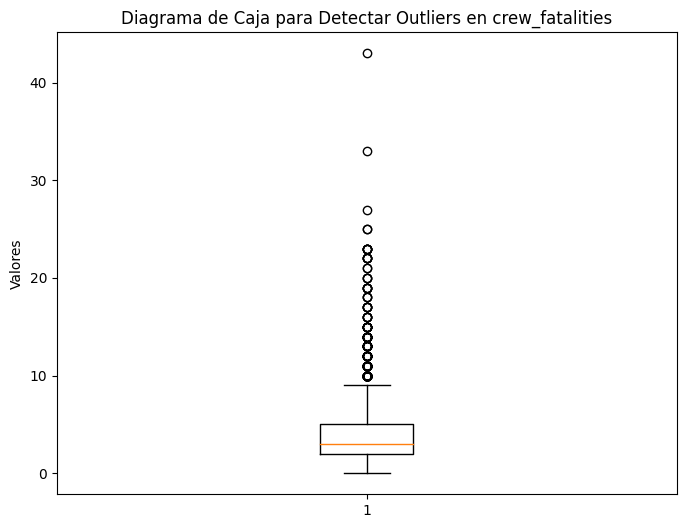

In [22]:
# Detectar outliers en una columna llamada 'crew_fatalities'
# TRIPULACION FALLECIDA 

plt.figure(figsize=(8, 6))
plt.boxplot(df_accid_aereos['crew_fatalities'])

plt.title('Diagrama de Caja para Detectar Outliers en crew_fatalities')
plt.ylabel('Valores')
plt.show()


SE VISUALIZA UN COMPORTAMIENTO NORMAL DE DATOS EN EL CAMPO 'crew_fatalities' EXCEPTO POR DOS REGISTROS OUTLIERS QUE PUDIERAN CONSIDERARSE ERRORES

Se ordena de mayor a menor la informacion en la columna 'crew_fatalities' para analizar los registros dudosos que pudieran ser error.

In [18]:
# Ordenar el DataFrame por la columna 'crew_fatalities' de mayor a menor
df_sorted = df_accid_aereos.sort_values(by='crew_fatalities', ascending=False)

# Imprimir el DataFrame ordenado
print(df_sorted[['crew_fatalities']])


      crew_fatalities
60                 43
4057               33
3027               27
708                25
2876               25
...               ...
2295                0
2291                0
2264                0
2263                0
0                   0

[4737 rows x 1 columns]


In [20]:
df_sorted.head(2)


,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
60,60,"August 24, 1921",1740,"River Humber, England",Military - Royal Airship Works,?,?,Royal Airship Works ZR-2 (airship),R-38,R-38,49,0,49,43,0,43,1,Crashed due to structural failure followed by ...
4057,4057,"November 12, 1996",1840,"Near Charkhi Dadri, India",Saudi Arabian Airlines / Kazakhstan Airlines,763/1907,New Delhi - Dhahran / Chimkent - New Delhi,Boeing B-747-168B / Ilyushin IL-76TD,HZ-AIH/UN-76435,22748/555/1023413428,349,316,33,349,316,33,0,Midair collision 17 km W of New Delhi. The Sa...


OUTLIERS TRIPULACION FALLECIDA
1er Registro
EL DATO QUE PODRIA CONSIDERARSE ERROR FUE UN 
# ACCIDENTE DE AVION MILITAR
Fecha del siniestro: August 24, 1921	
Operador : Military - Royal Airship Works	
Ruta: River Humber, England
# Tripulacion fallecida: 43 miembros

Es una información que no debe considerarse errónea dado que fue
un avion militar y el accidendte ocurrió hace mas de 100 años y es 
un accidente verdadero.

2do Registro
EL DATO QUE PODRIA CONSIDERARSE ERROR FUE UN 
# ACCIDENTE DE AVION EN LA INDIA
Fecha del siniestro: November 12, 1996		
Operador : Saudi Arabian Airlines / Kazakhstan Airlines	
Ruta: Near Charkhi Dadri, India
Personal a Bordo : 349
# Tripulacion fallecida: 33 miembros

Es una información no debe considerarse errónea dado que fue
un avion de gran capacidad, en la India, lo cual es esperado el nivel de decesos


VERIFICAR REGISTROS DUPLICADOS DE crew_fatalities EN UNA GRAFICA DE BARRAS

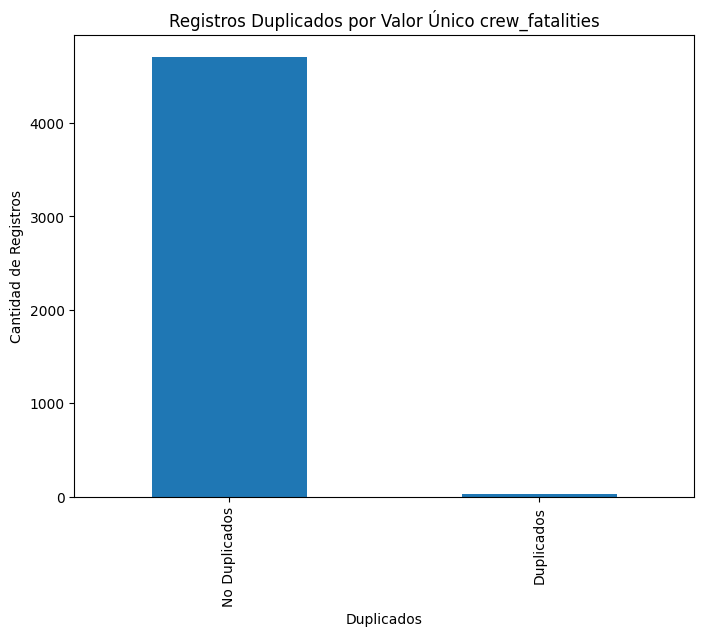

In [32]:
# Contar registros duplicados por valor único en la columna 'crew_fatalities'
duplicates_count = df_accid_aereos['crew_fatalities'].duplicated().value_counts()

# Crear un gráfico de barras para mostrar los registros duplicados
plt.figure(figsize=(8, 6))
duplicates_count.plot(kind='bar')
plt.title('Registros Duplicados por Valor Único crew_fatalities')
plt.xlabel('Duplicados')
plt.ylabel('Cantidad de Registros')
plt.xticks([0, 1], ['No Duplicados', 'Duplicados'])
plt.show()

SE NOTA QUE NO HAY REGISTROS DUPLICADOS, PERO SE VALIDA CON UN CONTEO MINUCIOSO, QUE EFECTIVAMENTE CONFIRMA LA INFORMACION DE LA GRAFICA DE BARRAS.

In [31]:
# Detectar registros duplicados
duplicates = df_accid_aereos[df_accid_aereos.duplicated()]

# Si deseas contar cuántos registros duplicados hay, puedes hacerlo de la siguiente manera:
num_duplicates = df_accid_aereos.duplicated().sum()

# Imprimir los registros duplicados
print("Registros duplicados:")
print(duplicates)

# Imprimir el número de registros duplicados
print(f"Número de registros duplicados: {num_duplicates}")

Registros duplicados:
Empty DataFrame
Columns: [Unnamed: 0, fecha, HORA declarada, Ruta, OperadOR, flight_no, route, ac_type, registration, cn_ln, all_aboard, PASAJEROS A BORDO, crew_aboard, cantidad de fallecidos, passenger_fatalities, crew_fatalities, ground, summary]
Index: []
Número de registros duplicados: 0


Se usa un diagrama de caja para detectar los outliers en la columna 'passenger_fatalities' que es el número de Pasajeros Fallecidos en el accidente, dato indispensable para el KPI No 2: 'Tasa de Supervivencia de Pasajeros'

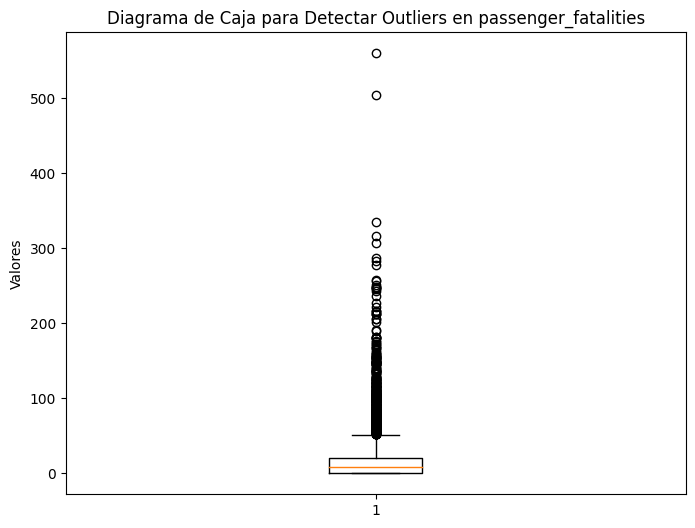

In [23]:
# Detectar outliers en una columna llamada 'passenger_fatalities'
# PASAJEROS FALLECIDOS

plt.figure(figsize=(8, 6))
plt.boxplot(df_accid_aereos['passenger_fatalities'])

plt.title('Diagrama de Caja para Detectar Outliers en passenger_fatalities')
plt.ylabel('Valores')
plt.show()


Se visualiza en el diagrama de caja un comportamiento normal en los datos del campo 'passenger_fatalities', excepto por dos registros outliers que pudieran considerarse erroneos.

In [25]:
# Se ordena el DataFrame por la columna 'passenger_fatalities' de mayor a menor, 
# para analizar los dos registros outliers.
df_sorted = df_accid_aereos.sort_values(by='passenger_fatalities', ascending=False)

df_sorted.head(2)


,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
2902,2902,"March 27, 1977",1707,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,19643/11 / 20400/157,644,614,30,583,560,23,0,Both aircraft were diverted to Tenerife becaus...
3341,3341,"August 12, 1985",1856,"Mt. Osutaka, near Ueno Village, Japan",Japan Air Lines,123,Tokyo - Osaka,Boeing B-747-SR46,JA8119,20783/230,524,509,15,520,505,15,0,The aircraft suffered an aft pressure bulkhead...


OUTLIERS EN PASAJEROS FALLECIDOS
1er Registro
EL DATO QUE PODRIA CONSIDERARSE OUTLIER FUE UN 
# ACCIDENTE DE AVION COMERCIAL EN TENERIFE
# CONSIDERADO EL ACCIDENTE DE AVIACION MAS GRANDE DEL MUNDO
# SEGUN LOS DATOS REGISTRADOS HASTA LA FECHA
Fecha del siniestro: March 27, 1977	
Operador : Pan American World Airways / KLM	
Ruta: Tenerife, Canary Islands	
# Pasajeros fallecidas: 560 

Es una información que no debe considerarse errónea dado que fue
un hecho comprobado y es considerado el mayor siniestro de aviación hasta la fecha

2do Registro
EL DATO QUE PODRIA CONSIDERARSE OUTLIER FUE UN 
# ACCIDENTE DE AVION EN JAPON
Fecha del siniestro: August 12, 1985		
Operador: Japan Air Lines	
Ruta: Tokyo - Osaka	
# Pasajeros fallecidos: 505 

Es una información que no debe considerarse errónea dado que fue el mayor 
accidente de un avión comercial en la historia en Japón cuando un Boeing 747 
de Japan Airlines se estrelló contra el monte Ogura en Japón. 

VERIFICAR REGISTROS DUPLICADOS DE passenger_fatalities USANDO UNA GRAFICA DE BARRAS

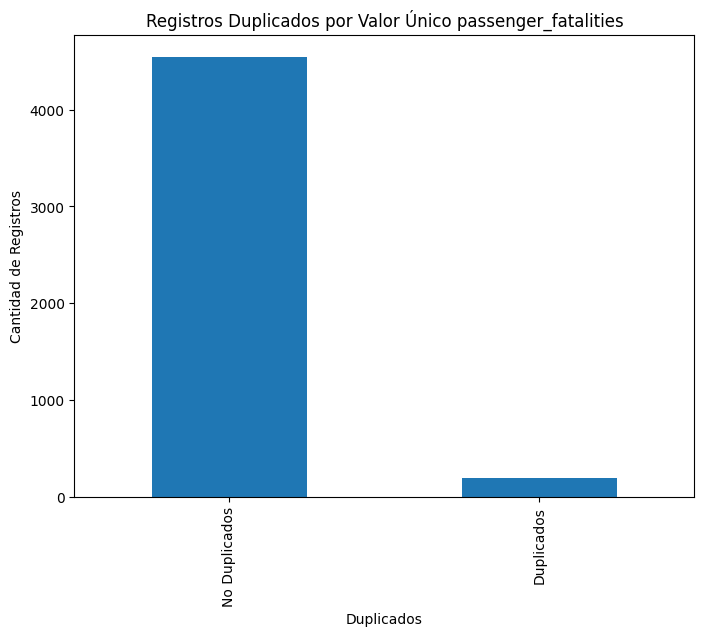

In [29]:
# Contar registros duplicados por valor único en la columna 'columna_de_interes'
duplicates_count = df_accid_aereos['passenger_fatalities'].duplicated().value_counts()

# Crear un gráfico de barras para mostrar los registros duplicados
plt.figure(figsize=(8, 6))
duplicates_count.plot(kind='bar')
plt.title('Registros Duplicados por Valor Único passenger_fatalities')
plt.xlabel('Duplicados')
plt.ylabel('Cantidad de Registros')
plt.xticks([0, 1], ['No Duplicados', 'Duplicados'])
plt.show()


Se valida la informacion de la grafica, haciendo un conteo minucioso, el cual nos confirma que efectivamente no se tienen registros duplicados

In [26]:
# Detectar registros duplicados
duplicates = df_accid_aereos[df_accid_aereos.duplicated()]

# Si deseas contar cuántos registros duplicados hay, puedes hacerlo de la siguiente manera:
num_duplicates = df_accid_aereos.duplicated().sum()

# Imprimir los registros duplicados
print("Registros duplicados:")
print(duplicates)

# Imprimir el número de registros duplicados
print(f"Número de registros duplicados: {num_duplicates}")


Registros duplicados:
Empty DataFrame
Columns: [Unnamed: 0, fecha, HORA declarada, Ruta, OperadOR, flight_no, route, ac_type, registration, cn_ln, all_aboard, PASAJEROS A BORDO, crew_aboard, cantidad de fallecidos, passenger_fatalities, crew_fatalities, ground, summary]
Index: []
Número de registros duplicados: 0


TENEMOS CERO REGISTROS DUPLICADOS

Se hace un resumen estadístico de las columnas numéricas en el DataFrame. Este resumen incluye varias estadísticas descriptivas para cada columna, como la cuenta de valores no nulos, la media, la desviación estándar, los valores mínimo y máximo, y los percentiles.

count: El número de valores no nulos en la columna.
mean: La media aritmética de la columna.
std: La desviación estándar de la columna.
min: El valor mínimo de la columna.
25%: El primer cuartil (percentil 25).
50%: La mediana (percentil 50), que es el valor que divide los datos en dos mitades iguales.
75%: El tercer cuartil (percentil 75).
max: El valor máximo de la columna.

In [42]:
df_accid_aereos.describe()

,Unnamed: 0,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground
count,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000
mean,2528.490184,31.475195,26.968123,4.517205,22.551193,19.037788,3.586025,1.769263
std,1438.023689,46.237296,44.199845,3.758966,35.763357,34.168385,3.170253,56.799179
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1291.000000,6.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,2531.000000,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,3779.000000,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,5007.000000,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2750.000000


Se detecta una informacion bastante depurada del DataFrame df_accid_aereos

SE DEPURA EL CAMPO FECHA Y SE CONVIERTE DE STRING A TIPO FECHA

In [ ]:
# Ahora, puedes decidir cómo manejar los valores NaN, por ejemplo, eliminándolos
df_accid_aereos.dropna(subset=['fecha'], inplace=True)

# Usaremos pd.to_datetime con errors='coerce' para manejar los valores no válidos
df_accid_aereos['fecha'] = pd.to_datetime(df_accid_aereos['fecha'], errors='coerce')

# Formateamos la columna 'fecha' al formato 'dd-mm-yyyy'
df_accid_aereos['fecha'] = df_accid_aereos['fecha'].dt.strftime('%d-%m-%Y')

# Si deseas reemplazar los NaN con un valor específico, puedes hacerlo así
df_accid_aereos['fecha'].fillna('01-01-1900', inplace=True)


A PARTIR DEL CAMPO FECHA CREAMOS UNA NUEVA COLUMNA LLAMADA DECADA, LA CUAL ES NECESARIA PARA LA ESTRATEGIA DE LA CREACION DEL KPI No. 1 'TASA DE FATALIDAD DE LA TRIPULACION'

In [47]:
# Convierte la columna 'fecha' en un objeto de fecha (datetime)
df_accid_aereos['fecha'] = pd.to_datetime(df_accid_aereos['fecha'])

# Define una función personalizada para obtener la década de una fecha
def obtener_decada(fecha):
    año = fecha.year
    decada = (año // 10) * 10
    return decada

# Aplica la función a la columna 'fecha' y crea la nueva columna 'decada'
df_accid_aereos['decada'] = df_accid_aereos['fecha'].apply(obtener_decada)

# Visualiza el DataFrame resultante
print(df_accid_aereos[['fecha', 'decada']])


          fecha  decada
0    1908-09-17    1900
1    1909-09-07    1900
2    1912-07-12    1910
3    1913-08-06    1910
6    1915-03-05    1910
...         ...     ...
5002 2021-03-02    2020
5003 2021-03-28    2020
5004 2021-05-21    2020
5005 2021-06-10    2020
5007 2021-07-06    2020

[4737 rows x 2 columns]


C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_15068\3874854015.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_accid_aereos['fecha'] = pd.to_datetime(df_accid_aereos['fecha'])


FINALMENTE AQUI CREAMOS EL ARCHIVO 'AccidentesAereos2.csv' CON EL CUAL SE TRABAJA EN POWER BI

In [51]:
df_accid_aereos.to_csv('AccidentesAereos2.csv', index=False)


In [48]:
nombres_columnas = df_accid_aereos.columns
print("Nombres de las columnas:")
print(nombres_columnas)

Nombres de las columnas:
Index(['Unnamed: 0', 'fecha', 'HORA declarada', 'Ruta', 'OperadOR',
       'flight_no', 'route', 'ac_type', 'registration', 'cn_ln', 'all_aboard',
       'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos',
       'passenger_fatalities', 'crew_fatalities', 'ground', 'summary',
       'decada'],
      dtype='object')


POR ULTIMO SE HACE UNA GRAFICA DE BARRAS APILADAS PARA DAR UN VISTAZO GENERAL CON LA INFROMACION RELEVANTE PARA LOS DOS KPIs PROPUESTOS EN EL PROYECTO

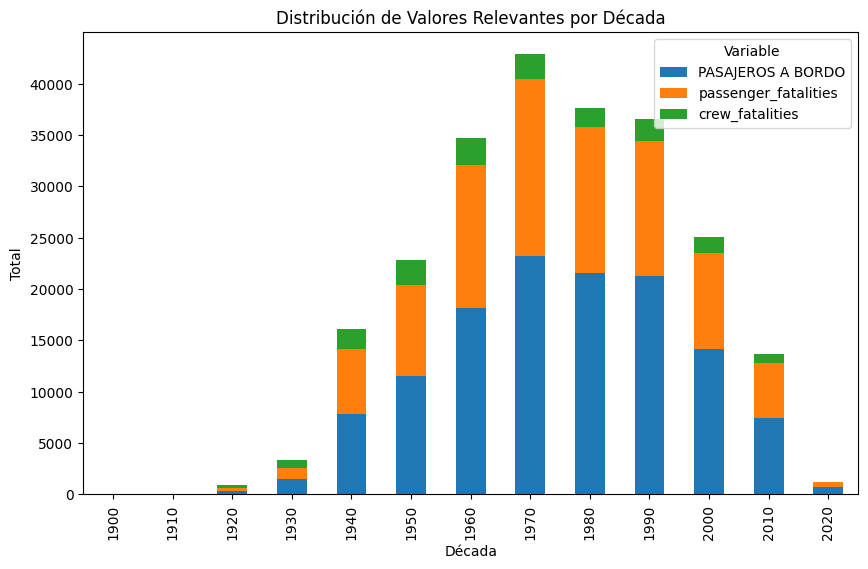

In [50]:
# Selecciona las columnas relevantes y agrupa por década
relevant_columns = ['PASAJEROS A BORDO', 'passenger_fatalities', 'crew_fatalities', 'decada']
data = df_accid_aereos[relevant_columns].groupby('decada').sum()

# Crea un gráfico de barras apiladas
data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribución de Valores Relevantes por Década")
plt.xlabel("Década")
plt.ylabel("Total")
plt.legend(title='Variable', loc='upper right')
plt.show()
